# Procesamiento de datos y vizualización

* Importar librerias

In [55]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import numpy as np
import matplotlib
import squarify
from wordcloud import WordCloud

* Cargamos los datos con la función read_csv()

In [56]:
data = pd.read_csv('Groceries_dataset.csv')

* Función head():
* Muestra por defecto las primeras 5 filas.
* Puede mostrar los elementos que querramos si pasamos un número entero a la funcion.

In [57]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


* info(): proporciona informacion sobre nuestra base de datos

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
Member_number      38765 non-null int64
Date               38765 non-null object
itemDescription    38765 non-null object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


* Visualizar nombre de comlumnas

In [59]:
data.columns.values

array(['Member_number', 'Date', 'itemDescription'], dtype=object)

* Top 20 de productos con mas transacciones

In [60]:
top = data['itemDescription'].value_counts()

In [61]:
df = top.to_frame()
df['item'] = df.index
df['index'] = range(0, len(top))
df.set_index('index', inplace=True)
df = df.rename(columns={'item':'itemDescription',
                                   'itemDescription':'count'})
df.head() 


,count,itemDescription
index,,
0,2502,whole milk
1,1898,other vegetables
2,1716,rolls/buns
3,1514,soda
4,1334,yogurt


### Palabras clave de los productos mas vendidos 

* Utilizamos la libreria plotly para vizualizar las siguientes graficas

(-0.5, 1199.5, 999.5, -0.5)

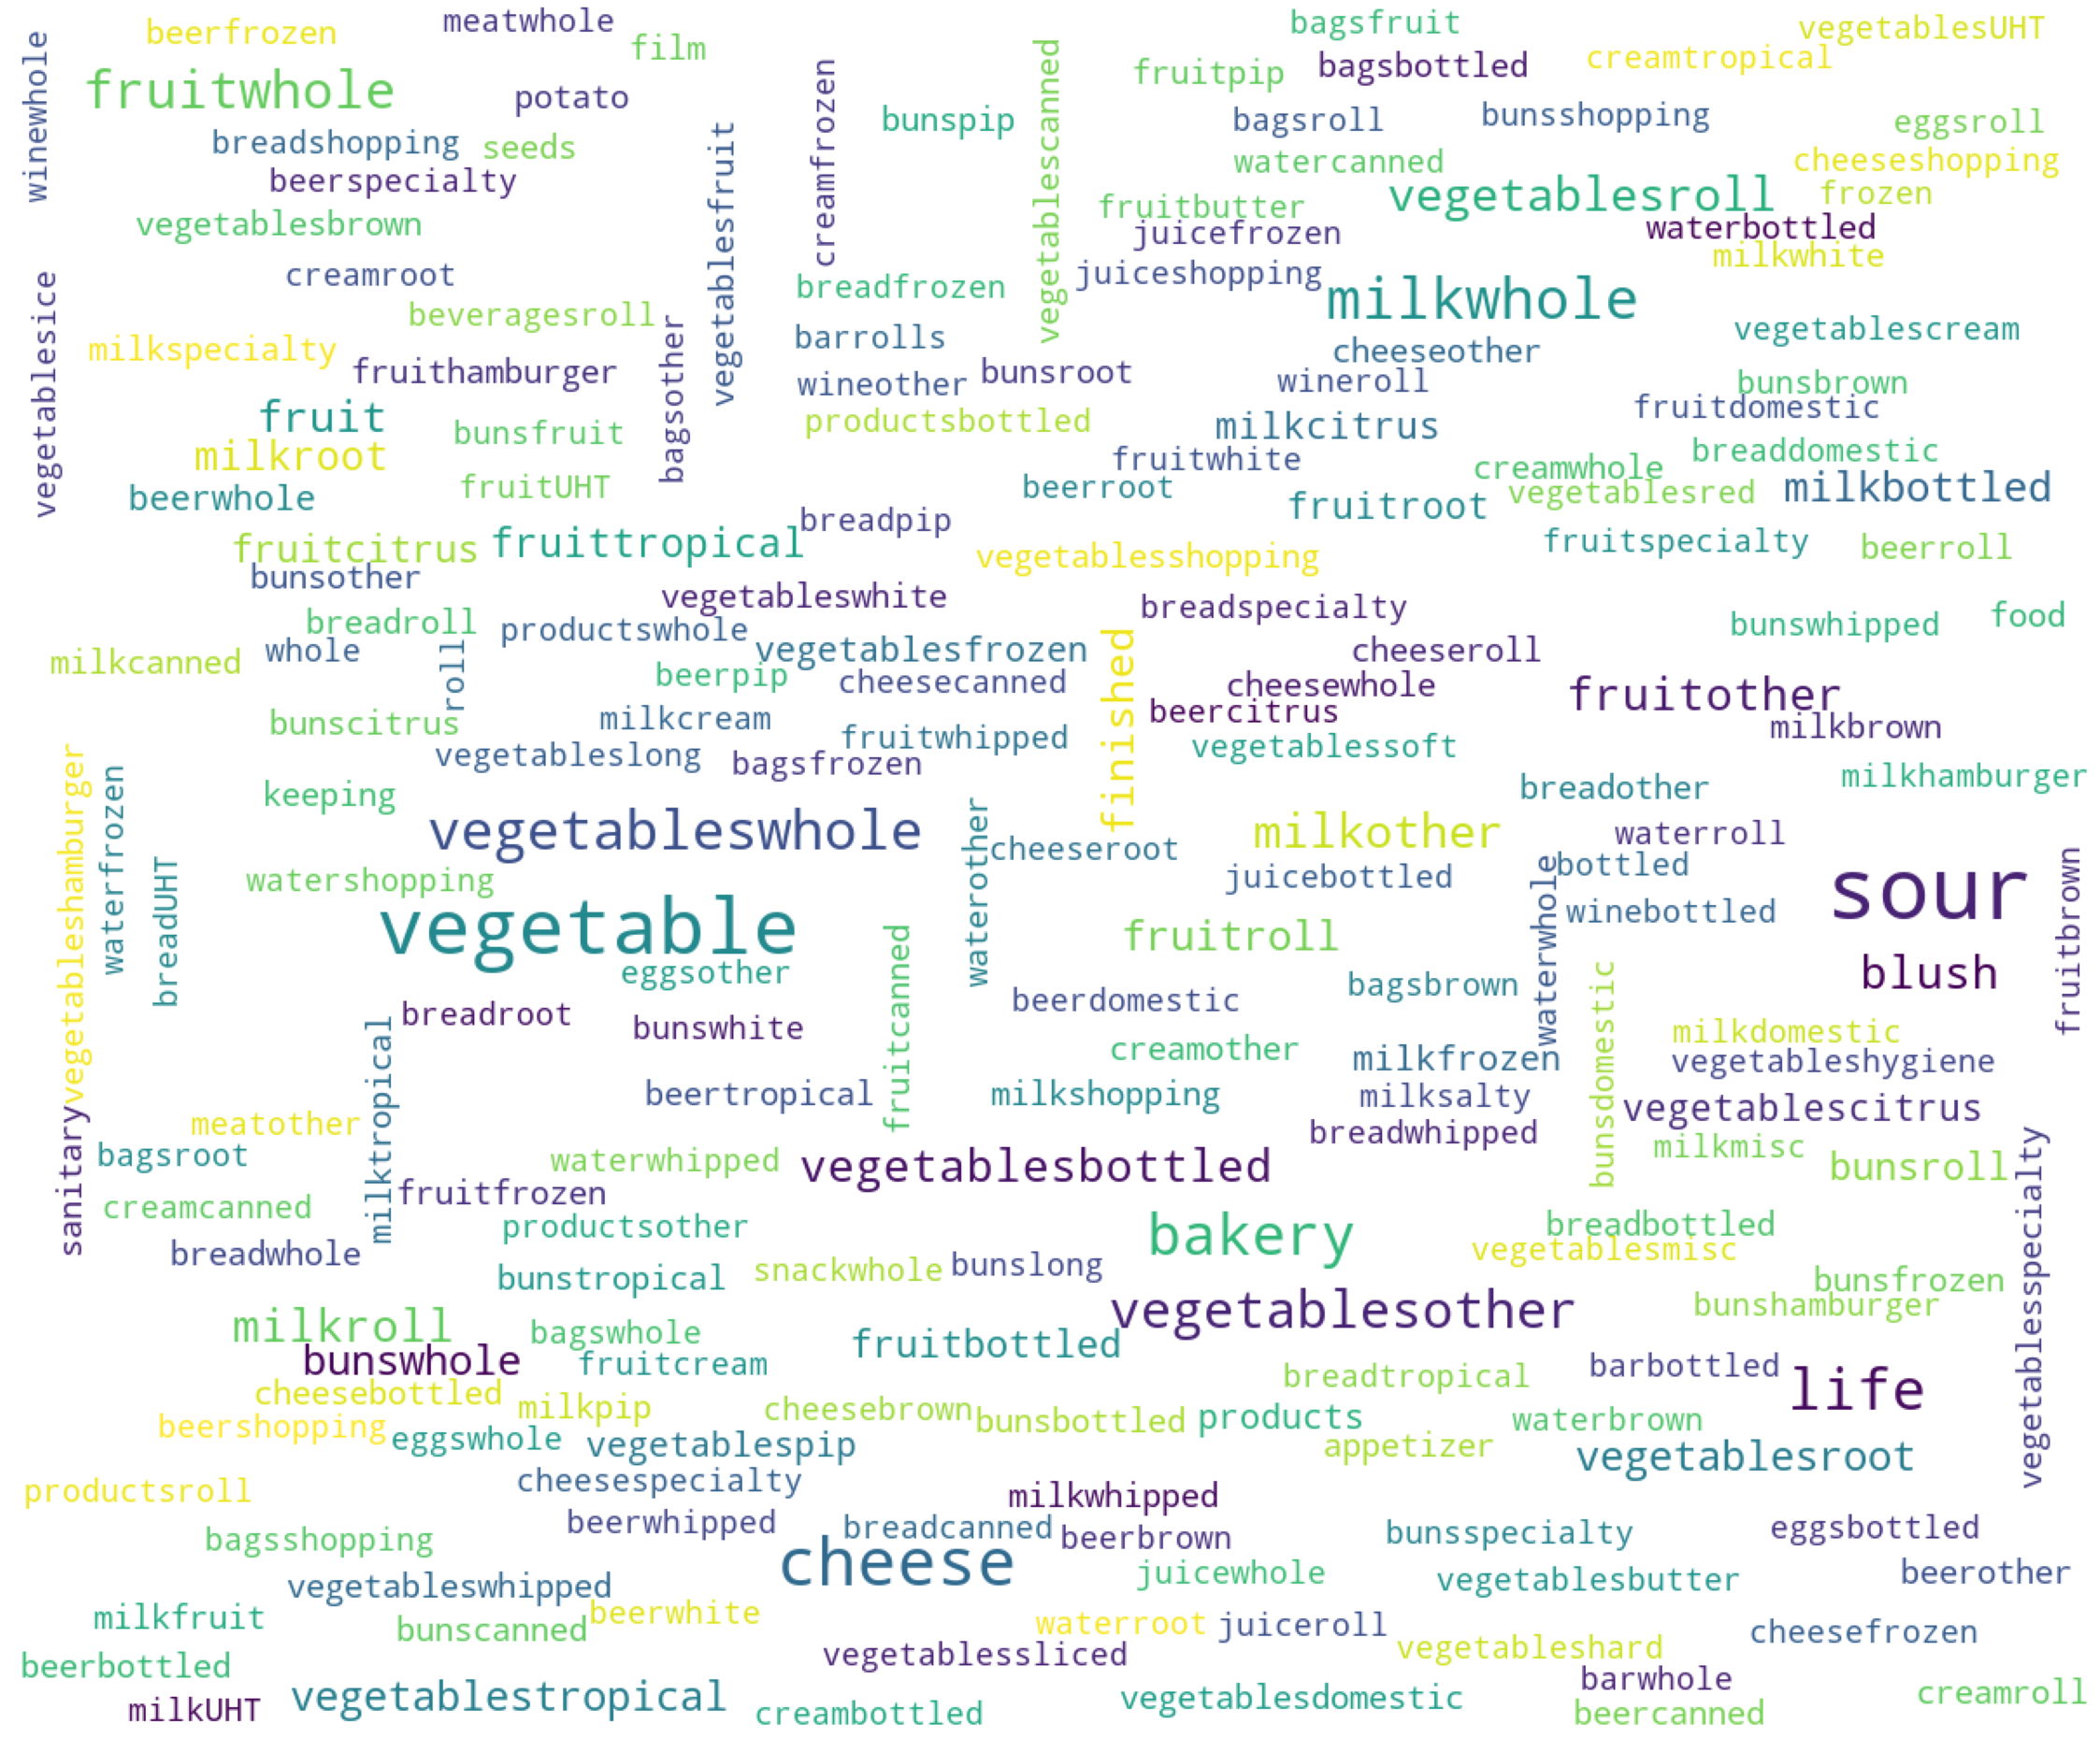

In [62]:
plt.subplots(figsize=(40,40))
wordcloud = WordCloud(background_color = 'white',
                          width=1200, height=1000,max_font_size = 50,
                      collocations=False).generate("".join(data['itemDescription']))

plt.imshow(wordcloud)
plt.axis('off')

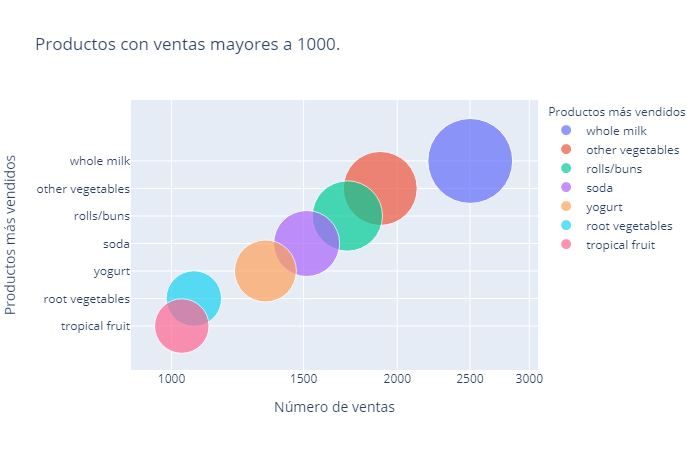

In [98]:
fig = px.scatter(df.query("count > 1000"), x="count", y="itemDescription",
         size="count", color="itemDescription",
                 hover_name="itemDescription", log_x=True, size_max=60,
            labels={'itemDescription':'Productos más vendidos','count':'Número de ventas'}
                , title="Productos con ventas mayores a 1000.",)
fig.show(renderer="png")

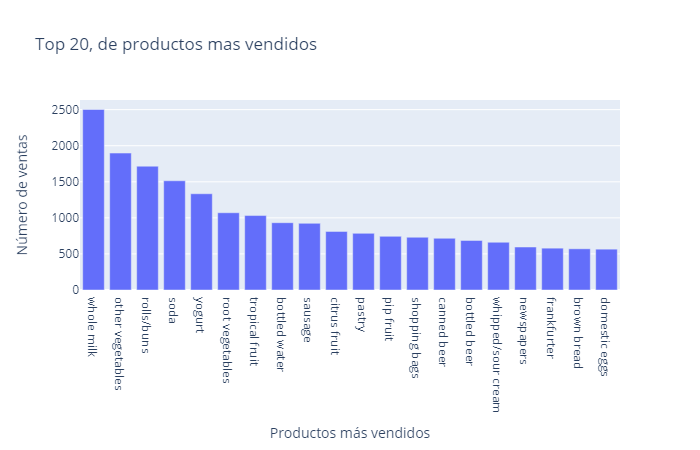

In [99]:
fig = px.bar(df[0:20],x='itemDescription', y='count', title="Top 20, de productos mas vendidos",
            labels={'itemDescription':'Productos más vendidos','count':'Número de ventas'})
fig.show(renderer="png")

In [65]:
data["Year"] = data["Date"].str.split("-").str[-1]
data["Months_Year"] = data["Date"].str.split("-").str[1] + "-" + data["Date"].str.split("-").str[-1] 


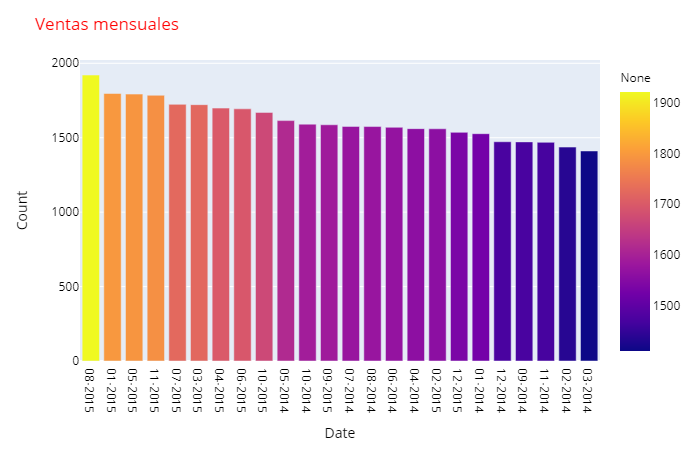

In [101]:
fig = px.bar(data["Months_Year"].value_counts(ascending=False), orientation="v", 
             color=data["Months_Year"].value_counts(ascending=False), 
             color_continuous_scale=px.colors.sequential.Plasma, 
             log_x=False, labels={'value':'Count', 'index':'Date','color':'None'})
fig.update_layout(
    font_color="black",
    title_font_color="red",
    legend_title_font_color="green",
    title_text="Ventas mensuales"
)

fig.show(renderer="png")

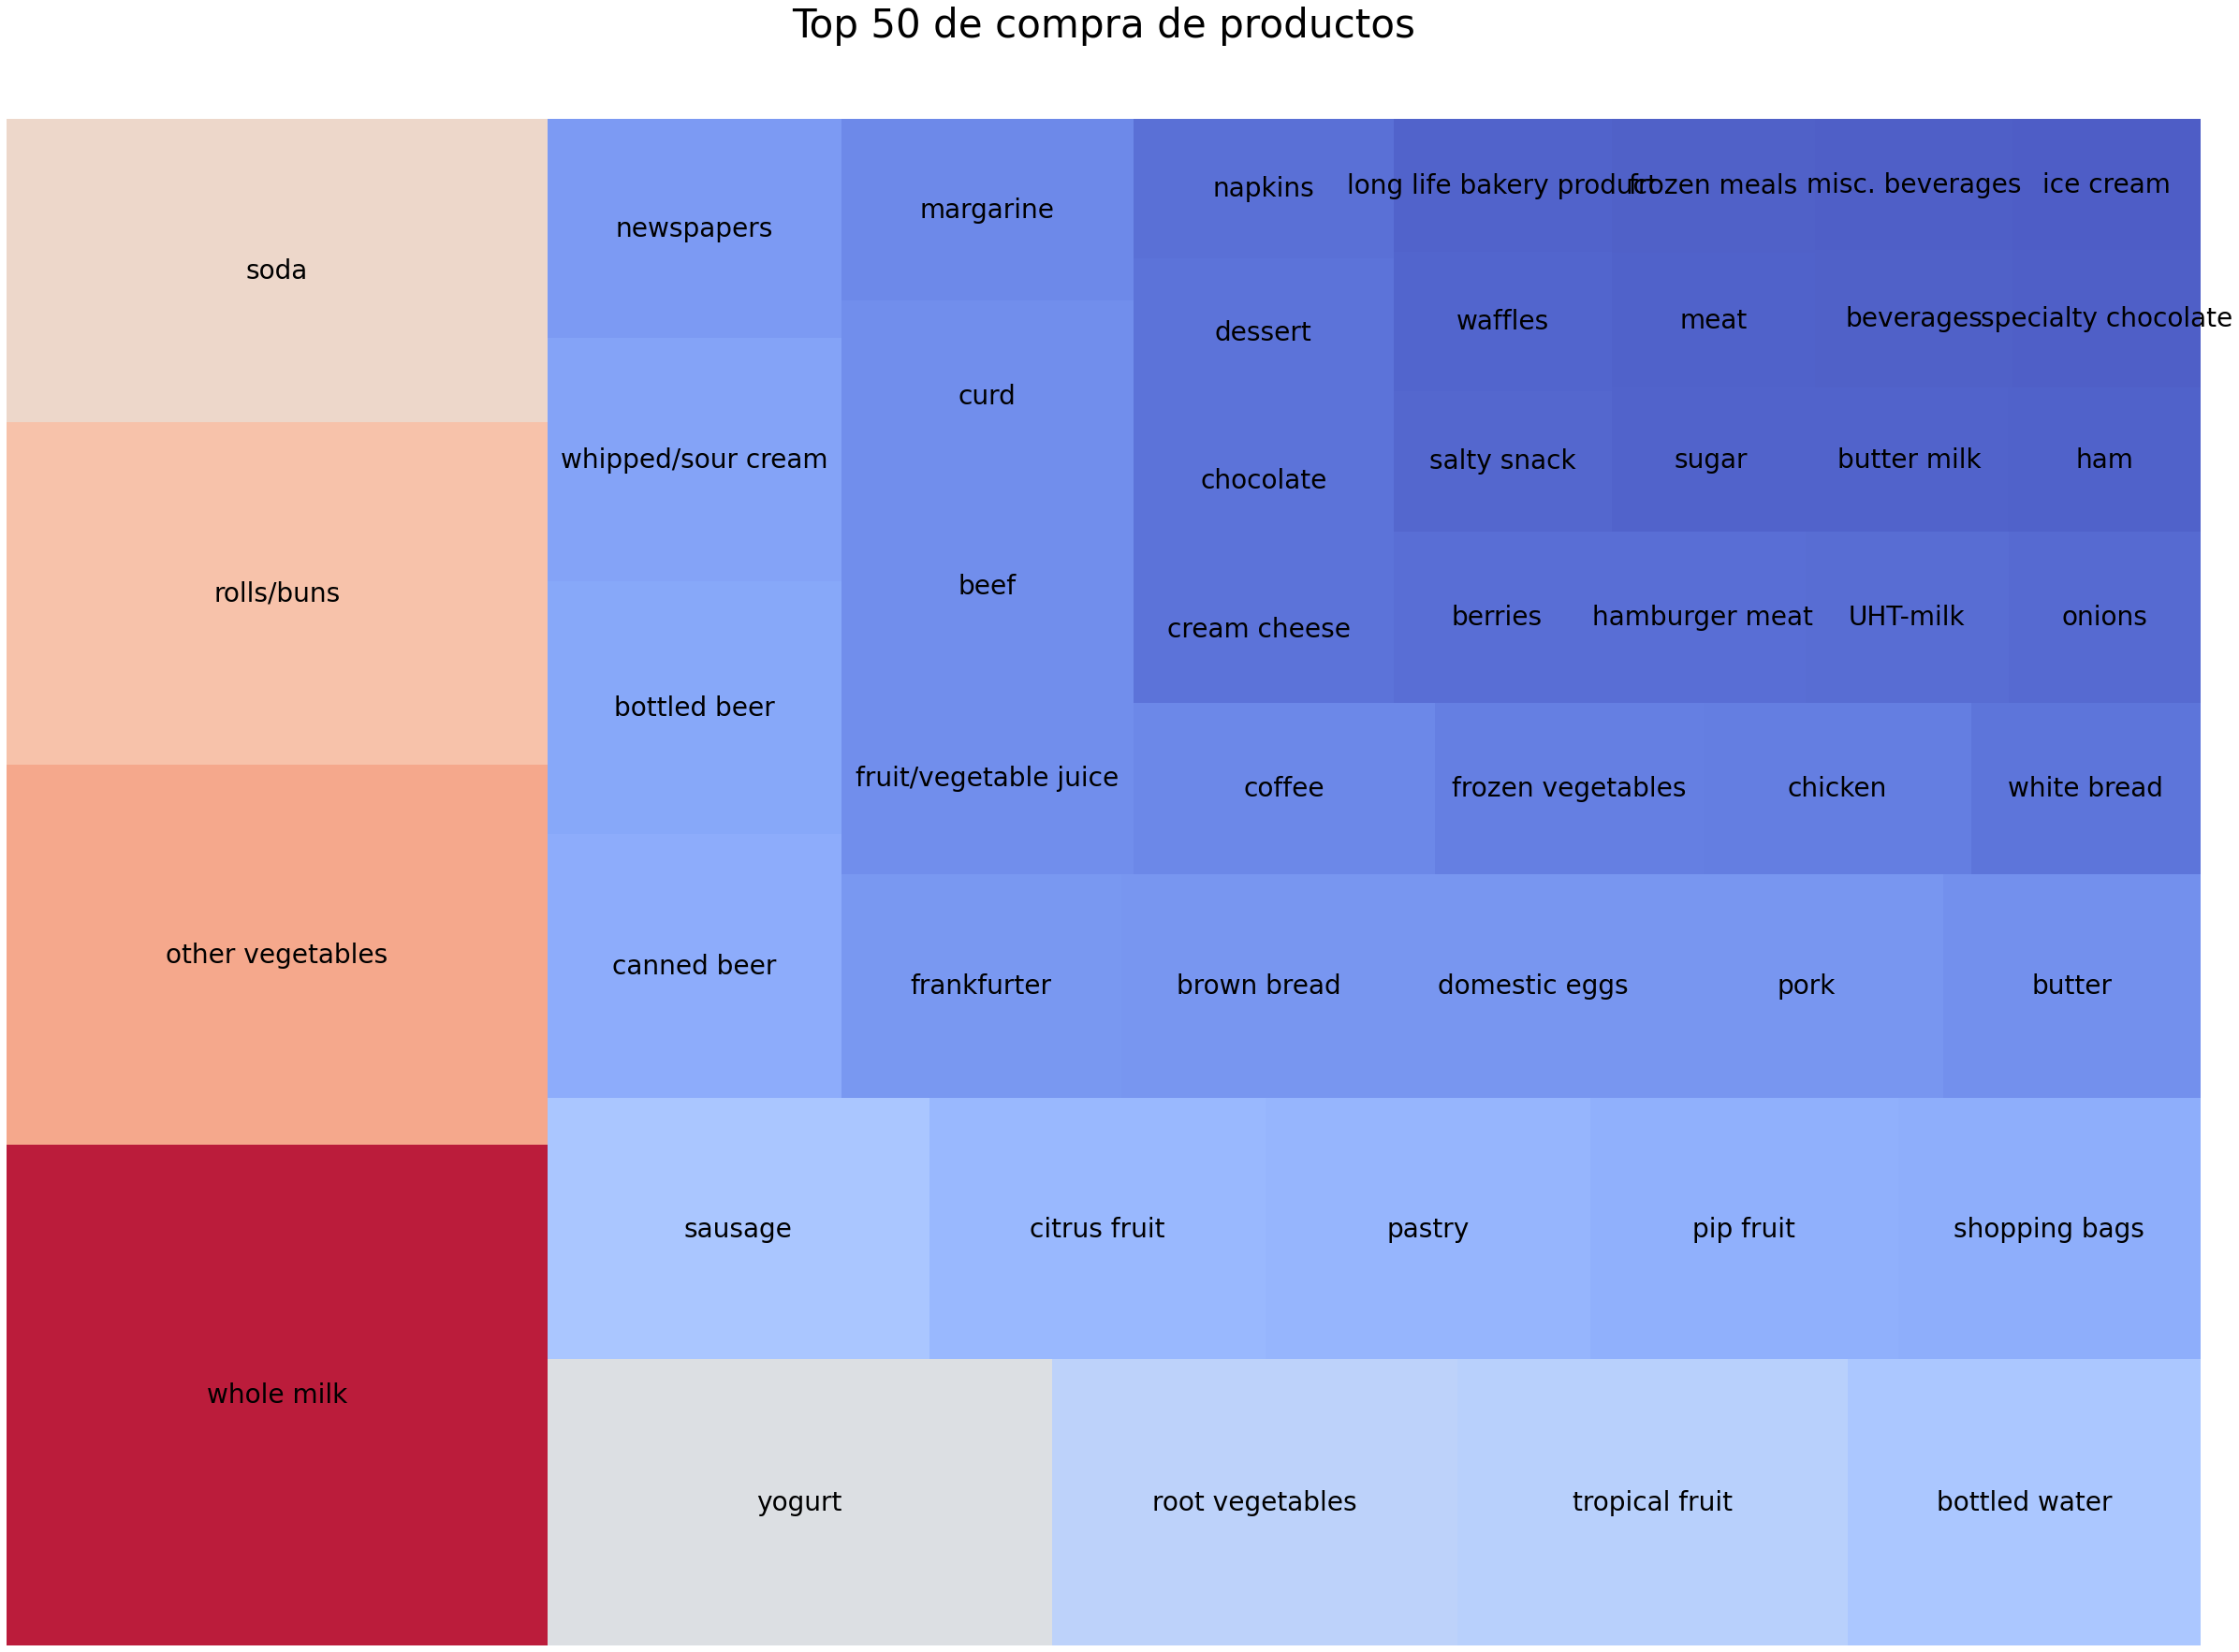

In [67]:
top50 = df[0:50]
fig, ax = plt.subplots()
cmap = matplotlib.cm.coolwarm
fig.set_size_inches(42, 30)

mini = min(top50["count"])
maxi = max(top50["count"])

norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in top50["count"]]

squarify.plot(sizes=top50["count"], label=top50["itemDescription"], alpha=0.9, color=colors,text_kwargs={'fontsize':28})
plt.axis('off')
plt.title("Top 50 de compra de productos",fontsize=42)
ttl = ax.title
ttl.set_position([.5, 1.05])

* Items totales

In [68]:
products  = data['itemDescription'].unique()

In [69]:
len(products)

167

* Cambiar nombre a las columnas de un dataset

* Creamos una lista con los nuevos nombres de nuestro dataset

In [70]:
data_col_list = ['A', 'B', 'C']

* Cargamos el dataset sin header o cabecera y le asignamos una nueva en el atributo names, pasamos una lista a este atributo

In [71]:
data2 = pd.read_csv('Groceries_dataset.csv',header = None, names = data_col_list)

In [72]:
data2.head()

,A,B,C
0,Member_number,Date,itemDescription
1,1808,21-07-2015,tropical fruit
2,2552,05-01-2015,whole milk
3,2300,19-09-2015,pip fruit
4,1187,12-12-2015,other vegetables


* Tipo de datos de las columnas

In [73]:
data.dtypes

Member_number       int64
Date               object
itemDescription    object
Year               object
Months_Year        object
dtype: object

* Devuelve las filas y columnas del data set

In [74]:
data.shape

(38765, 5)

* Muestra una descripcion estadistica básica 

In [75]:
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


# Eliminar valores nulos o faltantes

* Borra valores na
* axis = 0 borra filas y 1 borra columnas
* how = "all" si todas son NA
* how = "any" si alguna columna contiene un NA borramos toda la fila

In [76]:
data.dropna(axis = 0, how = "all")

,Member_number,Date,itemDescription,Year,Months_Year
0,1808,21-07-2015,tropical fruit,2015,07-2015
1,2552,05-01-2015,whole milk,2015,01-2015
2,2300,19-09-2015,pip fruit,2015,09-2015
3,1187,12-12-2015,other vegetables,2015,12-2015
4,3037,01-02-2015,whole milk,2015,02-2015
...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,2014,10-2014
38761,2022,23-02-2014,candy,2014,02-2014
38762,1097,16-04-2014,cake bar,2014,04-2014
38763,1510,03-12-2014,fruit/vegetable juice,2014,12-2014


* Cambiar los valores NA por otro valor

In [77]:
data.fillna("7")#Puede ser cualquier valor

,Member_number,Date,itemDescription,Year,Months_Year
0,1808,21-07-2015,tropical fruit,2015,07-2015
1,2552,05-01-2015,whole milk,2015,01-2015
2,2300,19-09-2015,pip fruit,2015,09-2015
3,1187,12-12-2015,other vegetables,2015,12-2015
4,3037,01-02-2015,whole milk,2015,02-2015
...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,2014,10-2014
38761,2022,23-02-2014,candy,2014,02-2014
38762,1097,16-04-2014,cake bar,2014,04-2014
38763,1510,03-12-2014,fruit/vegetable juice,2014,12-2014


* Remplazo aplicando a una sola columna

In [78]:
data["itemDescription"].fillna("no existe")

0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object

In [79]:
data["itemDescription"].fillna("Desconocido")
#Para sobreescribir -> data["body"] = data["body"].fillna(0)

0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object

* Suma los valores nulos de age.
* En principio los valores pueden ocupar mas de una fila;ravel crea un unico array ó fila de datos.

In [80]:
pd.isnull(data["itemDescription"]).values.ravel().sum()

0

* Agrega la media a los valores NA

In [81]:
data["Member_number"].fillna(data["Member_number"].mean())

0        1808
1        2552
2        2300
3        1187
4        3037
         ... 
38760    4471
38761    2022
38762    1097
38763    1510
38764    1521
Name: Member_number, Length: 38765, dtype: int64

* Sobrescribe el valor superior en el inferior si es NA

In [82]:
data["Member_number"].fillna(method = "ffill")

0        1808
1        2552
2        2300
3        1187
4        3037
         ... 
38760    4471
38761    2022
38762    1097
38763    1510
38764    1521
Name: Member_number, Length: 38765, dtype: int64

* Sobreescribe el valor inferior en el superior si es NA

In [83]:
data["Member_number"].fillna(method="backfill")

0        1808
1        2552
2        2300
3        1187
4        3037
         ... 
38760    4471
38761    2022
38762    1097
38763    1510
38764    1521
Name: Member_number, Length: 38765, dtype: int64

* La funcion astype cambia el tipo de dato.
* Si queremos sobreescribir los datos tenemos que hacer lo sigueinte
* data = data.astype({'pclass': 'int32'}).dtypes

In [84]:
data.astype({'Member_number': 'int64'}).dtypes

Member_number       int64
Date               object
itemDescription    object
Year               object
Months_Year        object
dtype: object

In [85]:
data.astype({'Date': 'str'}).dtypes

Member_number       int64
Date               object
itemDescription    object
Year               object
Months_Year        object
dtype: object

* Proceso para crear variables dummie:

In [86]:
def createDummies(df,var_name):
    dummy = pd.get_dummies(data[var_name] )
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df,dummy], axis = 1)
    return df

In [87]:
data.head()

,Member_number,Date,itemDescription,Year,Months_Year
0,1808,21-07-2015,tropical fruit,2015,07-2015
1,2552,05-01-2015,whole milk,2015,01-2015
2,2300,19-09-2015,pip fruit,2015,09-2015
3,1187,12-12-2015,other vegetables,2015,12-2015
4,3037,01-02-2015,whole milk,2015,02-2015


* Variables dummie

* Generamos variables dummie para poder utilizar el algoritmo apriori

In [88]:
data3 = createDummies(data,"itemDescription")

In [89]:
data3.shape

(38765, 171)

In [90]:
data3.head()

,Member_number,Date,Year,Months_Year,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,07-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,01-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,09-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,02-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


* Quitamos las columnas "Member_number","Date"
* Reseteamos el index

In [91]:
reportes = data3.groupby(["Member_number","Date"])[products[:]].sum()
reportes = reportes.reset_index()[products]

reportes.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Esta función realiza un cambio de numeros a palabras
* Solo si encuentra un 1 lo cambia por el nombre de la columna

In [92]:
def get_product_names(x):
    for product in products:
        if x[product] != 0:
            x[product] = product
    return x

reportes = reportes.apply(get_product_names, axis=1)
reportes.head()

print(f"Total transactions: {len(reportes)}")

Total transactions: 14963


In [93]:
x = reportes.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
transactions = x

* Utilizamos algoritmo de reglas de asociacion 
* Covertimos nuestras reglas a formato lista

In [94]:
association_rules = apriori(transactions,min_support=0.00030, min_confidance=0.01, min_lift=3, min_length=2, target="rules")


association_results = list(association_rules)

* Imprimir reglas de asociacion 

In [95]:
for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    
    print("Reglas : ", items[0], " -> " + items[1])
    print("Soporte : ", str(item[1]))
    print("Confianza : ",str(item[2][0][2]))
    print("Lift : ", str(item[2][0][3]))
    
    print("=====================================")

Reglas :  frozen fish  -> specialty chocolate
Soporte :  0.0003341575887188398
Confianza :  0.049019607843137254
Lift :  3.0689556157190907
Reglas :  liver loaf  -> fruit/vegetable juice
Soporte :  0.00040098910646260775
Confianza :  0.011787819253438114
Lift :  3.52762278978389
Reglas :  ham  -> pickled vegetables
Soporte :  0.0005346521419501437
Confianza :  0.03125
Lift :  3.4895055970149254
Reglas :  meat  -> roll products 
Soporte :  0.0003341575887188398
Confianza :  0.019841269841269844
Lift :  3.620547812620984
Reglas :  misc. beverages  -> salt
Soporte :  0.0003341575887188398
Confianza :  0.0211864406779661
Lift :  3.5619405827461437
Reglas :  spread cheese  -> misc. beverages
Soporte :  0.0003341575887188398
Confianza :  0.0211864406779661
Lift :  3.170127118644068
Reglas :  soups  -> seasonal products
Soporte :  0.0003341575887188398
Confianza :  0.04716981132075471
Lift :  14.704205974842766
Reglas :  spread cheese  -> sugar
Soporte :  0.00040098910646260775
Confianza :  0